# Анализ данных по объявлениям с сайта Авито о продаже вторичной недвижимости в городе Санкт-Петербурге

Определить цену и район для поиска недорогой квартиры

Для решения задачи, нужно ответить на следующие вопросы:
*   Какие квартиры чаще всего продают?
*   Можно купить часть квартиры? И за сколько?
*   Какие минимальные цены на квартиры?
*   Возле каких станций метро самые дешевые квартиры?
*   Средняя цена на 1-к квартиру с распределением по станциям метро?









### Подгружаем необходимые библиотеки

In [ ]:
import pandas as pd
import sqlite3
import json
import urllib.request

### Импорт датасета

In [ ]:
full_json = []
total_len = 0

# у github ограничение на загрузку файлов до 25Мб, поэтому данные разбиты на части
url_files = ['https://raw.githubusercontent.com/rfyodorov/dataset-avito-apartment/main/items-1k.json',
              'https://raw.githubusercontent.com/rfyodorov/dataset-avito-apartment/main/items-2k.json',
              'https://raw.githubusercontent.com/rfyodorov/dataset-avito-apartment/main/items-3k.json',
              'https://raw.githubusercontent.com/rfyodorov/dataset-avito-apartment/main/items-4k.json',
              'https://raw.githubusercontent.com/rfyodorov/dataset-avito-apartment/main/items-5k.json',
              'https://raw.githubusercontent.com/rfyodorov/dataset-avito-apartment/main/items-studio.json']

for url_file in url_files:
    with urllib.request.urlopen(url_file) as json_url:
      print("Importing:", url_file)
      apartment_json = json.load(json_url)

      print("Entries count:", len(apartment_json))
      total_len += len(apartment_json)
      full_json += apartment_json

# сохраняем итоговый файл в dataset-avito.json
with open("dataset-avito.json", 'w', encoding='utf-8') as f:
    json.dump(full_json, f, ensure_ascii=False, indent=4)



Importing: https://raw.githubusercontent.com/rfyodorov/dataset-avito-apartment/main/items-1k.json
Entries count: 4948
Importing: https://raw.githubusercontent.com/rfyodorov/dataset-avito-apartment/main/items-2k.json
Entries count: 4947
Importing: https://raw.githubusercontent.com/rfyodorov/dataset-avito-apartment/main/items-3k.json
Entries count: 4950
Importing: https://raw.githubusercontent.com/rfyodorov/dataset-avito-apartment/main/items-4k.json
Entries count: 5000
Importing: https://raw.githubusercontent.com/rfyodorov/dataset-avito-apartment/main/items-5k.json
Entries count: 750
Importing: https://raw.githubusercontent.com/rfyodorov/dataset-avito-apartment/main/items-studio.json
Entries count: 4946


In [ ]:
# загружаем датасет в переменную df
df = pd.read_json('dataset-avito.json')

### Проверяем, наличие данных в датасете (датасет не должен быть пустым)

In [ ]:
df.head()

,name,currency,price,apartment,rooms,area,floor,total_floor,address,description,metro,distance_to_metro,seller_name,seller_pub,advert
0,"1-к. квартира, 40 м², 6/16 эт.",RUB,7200000,1-к. квартира,1,40.0,6,16,"ул. Кораблестроителей, 37к4",Подходим под Любой тип сделки. Один собственни...,Приморская,11–15 мин.,Недвижимость,21 завершённое объявление,False
1,"1-к. квартира, 37 м², 2/25 эт.",RUB,7200000,1-к. квартира,1,37.0,2,25,"Комендантский пр-т, 65",Внимание! Интересное предложение. О Доме: ЖК U...,Комендантский проспект,от 31 мин.,BADADOM BUSINESS,1093 завершённых объявления,False
2,"1-к. квартира, 45,5 м², 2/24 эт.",RUB,7200000,1-к. квартира,1,45.5,2,24,"Суздальское ш., 18к4","Арт. 43088888 Санкт-Петербург, Приморский ст. ...",Проспект Просвещения,от 31 мин.,"Агентство недвижимости ""Весь Петербург""",843 завершённых объявления,False
3,"1-к. квартира, 35,2 м², 16/18 эт.",RUB,7200000,1-к. квартира,1,35.2,16,18,"Афонская ул., 24к3",Внимание! Вся мебель остается! О Квартире: Ква...,Озерки,21–30 мин.,BADADOM BUSINESS,1093 завершённых объявления,False
4,"1-к. квартира, 35,3 м², 17/17 эт.",RUB,7200000,1-к. квартира,1,35.3,17,17,"ул. Бадаева, 8к2",Эта Квартира В Ипотеку Будет Выгоднее Других! ...,Проспект Большевиков,11–15 мин.,Самолет Плюс Санкт-Петербург Приморский,1254 завершённых объявления,False


### Общая информация о датасете


In [ ]:
dfName = [x for x in globals() if globals()[x] is df][0]
print(f'Название датасета: {dfName} \n')

rows_num,columns_num = df.shape
print(f'Количество записей: {rows_num}')
print(f'Количество столбцов: {columns_num}\n')

print('Общая информация о датасете:\n')
print(df.info())

Название датасета: df 

Количество записей: 25541
Количество столбцов: 15

Общая информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25541 entries, 0 to 25540
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               25541 non-null  object 
 1   currency           25541 non-null  object 
 2   price              25541 non-null  int64  
 3   apartment          25541 non-null  object 
 4   rooms              25541 non-null  object 
 5   area               25541 non-null  float64
 6   floor              25541 non-null  int64  
 7   total_floor        25541 non-null  int64  
 8   address            25541 non-null  object 
 9   description        25541 non-null  object 
 10  metro              25541 non-null  object 
 11  distance_to_metro  25541 non-null  object 
 12  seller_name        25541 non-null  object 
 13  seller_pub         25541 non-null  object 
 14  advert       

### Проверяем название колонок



In [ ]:
list(df.columns)

['name',
 'currency',
 'price',
 'apartment',
 'rooms',
 'area',
 'floor',
 'total_floor',
 'address',
 'description',
 'metro',
 'distance_to_metro',
 'seller_name',
 'seller_pub',
 'advert']

Вывод
Требуется переименовать два столбца:
*   name > title
*   advert > ad

Также удалим столбцы:
*   advert
*   seller_name
*   seller_pub
*   description



In [ ]:
df = df.rename(columns={"name": "title", "advert":"ad"})
list(df.columns)

['title',
 'currency',
 'price',
 'apartment',
 'rooms',
 'area',
 'floor',
 'total_floor',
 'address',
 'description',
 'metro',
 'distance_to_metro',
 'seller_name',
 'seller_pub',
 'ad']

In [ ]:
df = df.drop(columns=['description','seller_name','seller_pub','ad'])

In [ ]:
list(df.columns)

['title',
 'currency',
 'price',
 'apartment',
 'rooms',
 'area',
 'floor',
 'total_floor',
 'address',
 'metro',
 'distance_to_metro']

### Проверка на дублика

In [ ]:
print("Длинна сырого датасета:", len(df))
raw_dataset_len = len(df)
print(df[df.duplicated()])

Длинна сырого датасета: 25541
                                        title currency     price  \
3630           1-к. квартира, 41 м², 7/12 эт.      RUB   5950000   
3643         1-к. квартира, 40,7 м², 4/27 эт.      RUB   5950000   
11049        3-к. квартира, 76,5 м², 4/13 эт.      RUB  10500000   
11096          3-к. квартира, 76 м², 1/16 эт.      RUB  12500000   
11845         3-к. квартира, 92,5 м², 1/5 эт.      RUB  10800000   
...                                       ...      ...       ...   
22216         Квартира-студия, 16 м², 3/5 эт.      RUB   6996080   
22918         Квартира-студия, 14 м², 3/6 эт.      RUB   4050000   
24108         Квартира-студия, 14 м², 3/4 эт.      RUB   5050000   
24812  Апартаменты-студия, 22,8 м², 19/20 эт.      RUB   7300000   
24924         Квартира-студия, 22 м², 3/6 эт.      RUB   6652854   

                apartment               rooms  area  floor  total_floor  \
3630        1-к. квартира                   1  41.0      7           12   
364


Вывод: надо удалить дубликаты

In [ ]:
df = df.drop_duplicates()
print("Количество записей после удаления дубликатов:", len(df), "(было", raw_dataset_len,")" )

Количество записей после удаления дубликатов: 20578 (было 25541 )


In [ ]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [title, currency, price, apartment, rooms, area, floor, total_floor, address, metro, distance_to_metro]
Index: []


### Проверка на типы данных


In [ ]:
df.dtypes

title                 object
currency              object
price                  int64
apartment             object
rooms                 object
area                 float64
floor                  int64
total_floor            int64
address               object
metro                 object
distance_to_metro     object
dtype: object

Вывод: типы данных заданы корректно

### Проверяем количество пустых значений

In [ ]:
df.count()

title                20578
currency             20578
price                20578
apartment            20578
rooms                20578
area                 20578
floor                20578
total_floor          20578
address              20578
metro                20578
distance_to_metro    20578
dtype: int64

In [ ]:
# Если результат >0, то в столбце нехватает записи
df.isna().sum().sort_values()

title                0
currency             0
price                0
apartment            0
rooms                0
area                 0
floor                0
total_floor          0
address              0
metro                0
distance_to_metro    0
dtype: int64

Вывод: все столбцы заполнены данными

### Приведение названия колонок к нижнему регистру, замена пробелов на '_'

In [ ]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
df.columns

Index(['title', 'currency', 'price', 'apartment', 'rooms', 'area', 'floor',
       'total_floor', 'address', 'metro', 'distance_to_metro'],
      dtype='object')

Приводим значение в категории *apartment* к общему виду (для 'доли в квартире студии')

In [ ]:
df.apartment.unique()
df = df.replace('Доля в квартире-студии', 'Доля в квартира-студии')

## Создаем БД SQL lite и загружаем в нее датасет.

In [ ]:
con = sqlite3.connect('project_avito1.db', timeout=10)

cursor = con.cursor()
cursor.execute('DROP table IF EXISTS avito')

df.to_sql(con=con, name='avito', index=False)

20578

# Анализ данных
Обращения производятся к БД

### Подготовка

In [ ]:
# подключаем библиотеку seaborn для визуализации данных
import seaborn as sns

Создаю витрину **avito_hot** для удобного просмотра данных. Исключаю из вывода квартиры с большим количеством комнат и находящиеся в доле или аукционе.

In [ ]:
sql_query = """
DROP VIEW IF EXISTS avito_hot
"""
cursor = con.cursor()
cursor.execute(sql_query)

In [ ]:
# витрина avito_hot
sql_query = """
CREATE VIEW avito_hot as
select * from avito
WHERE apartment LIKE '%вартира%' and apartment NOT LIKE 'Доля%' and apartment NOT LIKE 'Аукцион%' and apartment NOT LIKE '> 9-к%'
and apartment NOT LIKE '10%' and apartment NOT LIKE '9-к%' and apartment NOT LIKE '8-к%' and apartment NOT LIKE '7-к%' and apartment NOT LIKE '6-к%'  and apartment NOT LIKE '5-к%'  and apartment NOT LIKE '4-к%'
"""
cursor = con.cursor()
cursor.execute(sql_query)

### Вопрос: Какие квартиры чаще всего продают?

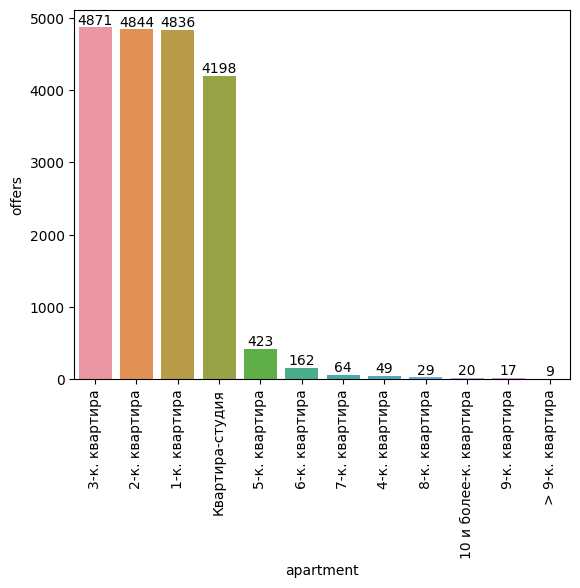

In [ ]:
# Какие квартиры чаще всего продают
sql_query = """
SELECT apartment, count(*) as offers
FROM avito
WHERE apartment LIKE '%вартира%' and apartment NOT LIKE 'Доля%' and apartment NOT LIKE 'Аукцион%'
group by apartment
order by offers DESC
"""
df_from_sql = pd.read_sql_query(sql_query, con=con)

my_plot = sns.barplot(data=df_from_sql, x="apartment", y="offers")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

for i in my_plot.containers:
    my_plot.bar_label(i,)



Вывод: *Больше всего объявлений о продаже 1-2-3 к. квартир.
Интересно, что предложений с 5-6-7 к. квартирами больше, чем 4-к квартир.*

### Вопрос: Можно купить часть квартиры? и за сколько?

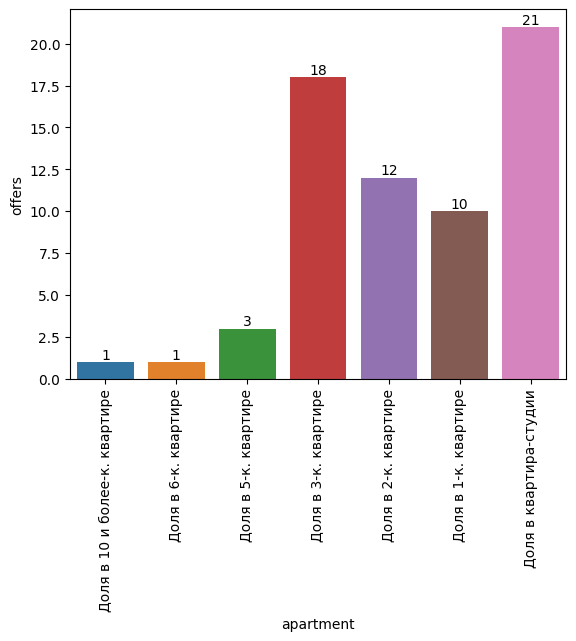

In [ ]:
# Можно ли купить долю в квартире
sql_query = """
SELECT apartment,
    count(*) as offers,
	MIN(price) as min_price
FROM avito
WHERE apartment LIKE 'Доля%'
group by apartment
order by min_price DESC
"""
df_from_sql = pd.read_sql_query(sql_query, con=con)

my_plot = sns.barplot(data=df_from_sql, x="apartment", y="offers")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

for i in my_plot.containers:
    my_plot.bar_label(i,)



In [ ]:
sql_query = """
SELECT apartment,
    count(*) as offers,
	MIN(price) as min_price
	--cast(median(price) as integer) as median_price
FROM avito
WHERE apartment LIKE 'Доля%'
group by apartment
order by min_price DESC
"""
df_from_sql = pd.read_sql_query(sql_query, con=con)
df_from_sql.sort_values('min_price')

,apartment,offers,min_price
6,Доля в квартира-студии,21,2800000
5,Доля в 1-к. квартире,10,3999999
4,Доля в 2-к. квартире,12,5350000
3,Доля в 3-к. квартире,18,7450000
1,Доля в 6-к. квартире,1,19100000
2,Доля в 5-к. квартире,3,19100000
0,Доля в 10 и более-к. квартире,1,75000000


Вывод: *Да, можно купить не всю квартиру, например только долю в квартире студии (21 предложений), скорей всего эти квартиры находятся в не погашеной ипотеке.

### Какие минимальные цены на квартиры?

[Text(0, 0, '3,800,000'),
 Text(0, 0, '6,250,000'),
 Text(0, 0, '8,450,000'),
 Text(0, 0, '2,797,000')]

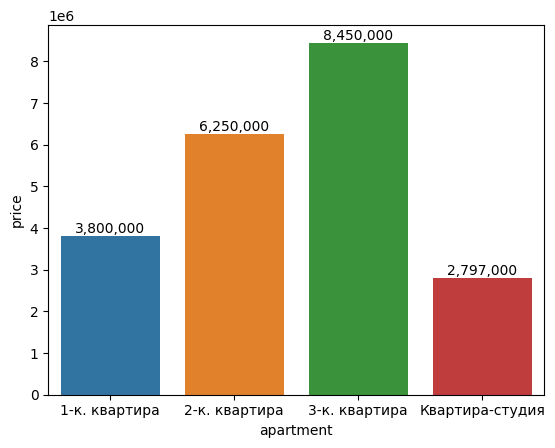

In [ ]:
sql_query = """
SELECT * FROM (
	SELECT
	apartment,
	price,
	metro,
	distance_to_metro,
	ROW_NUMBER () OVER (PARTITION BY apartment ORDER BY price ASC) AS "rank"
	FROM avito_hot
	GROUP by apartment, metro
) WHERE rank = 1
"""
df_from_sql = pd.read_sql_query(sql_query, con=con)
df_from_sql

my_plot = sns.barplot(data=df_from_sql, x="apartment", y="price")
my_plot.bar_label(my_plot.containers[0], fmt='{:,.0f}')

Вывод: *2800 000 за студию, если добавить 1000 000 можно купить 1-к.
2500 000 надо добавить к 1-к, чтобы купить 2-к*

### Возле каких станций метро самые дешевые квартиры?

In [ ]:
sql_query = """
SELECT * FROM (
	SELECT
	apartment,
	price,
	metro,
	distance_to_metro,
	ROW_NUMBER () OVER (PARTITION BY apartment ORDER BY price ASC) AS "rank"
	FROM avito_hot
	GROUP by apartment, metro
) WHERE rank <=5
;
"""
df_from_sql = pd.read_sql_query(sql_query, con=con)
df_from_sql

,apartment,price,metro,distance_to_metro,rank
0,1-к. квартира,3800000,Московские ворота,16–20 мин.,1
1,1-к. квартира,3800000,Садовая,21–30 мин.,2
2,1-к. квартира,3800000,Чкаловская,до 5 мин.,3
3,1-к. квартира,3800000,Электросила,11–15 мин.,4
4,1-к. квартира,4160000,Площадь А. Невского I,6–10 мин.,5
5,2-к. квартира,6250000,Спортивная,до 5 мин.,1
6,2-к. квартира,7490000,Электросила,11–15 мин.,2
7,2-к. квартира,7900000,Академическая,от 31 мин.,3
8,2-к. квартира,7900000,Гражданский проспект,16–20 мин.,4
9,2-к. квартира,7900000,Звёздная,от 31 мин.,5


Вывод: Дешевые 1-к можно найти близко к центру города.

### Средняя цена на 1-комнатную квартиру с распределением по станциям метро


Запрос в DBeaver
```
SELECT
	metro,
	apartment,
	count(*) as offers,
	cast(median(price) as integer) as median_price,
	cast(median(area) as integer) as median_area,
	cast(median(price) as integer) / cast(median(area) as integer) as avg_price_m2
FROM avito
WHERE apartment = '1-к. квартира'
GROUP by metro
order by median_price;
```
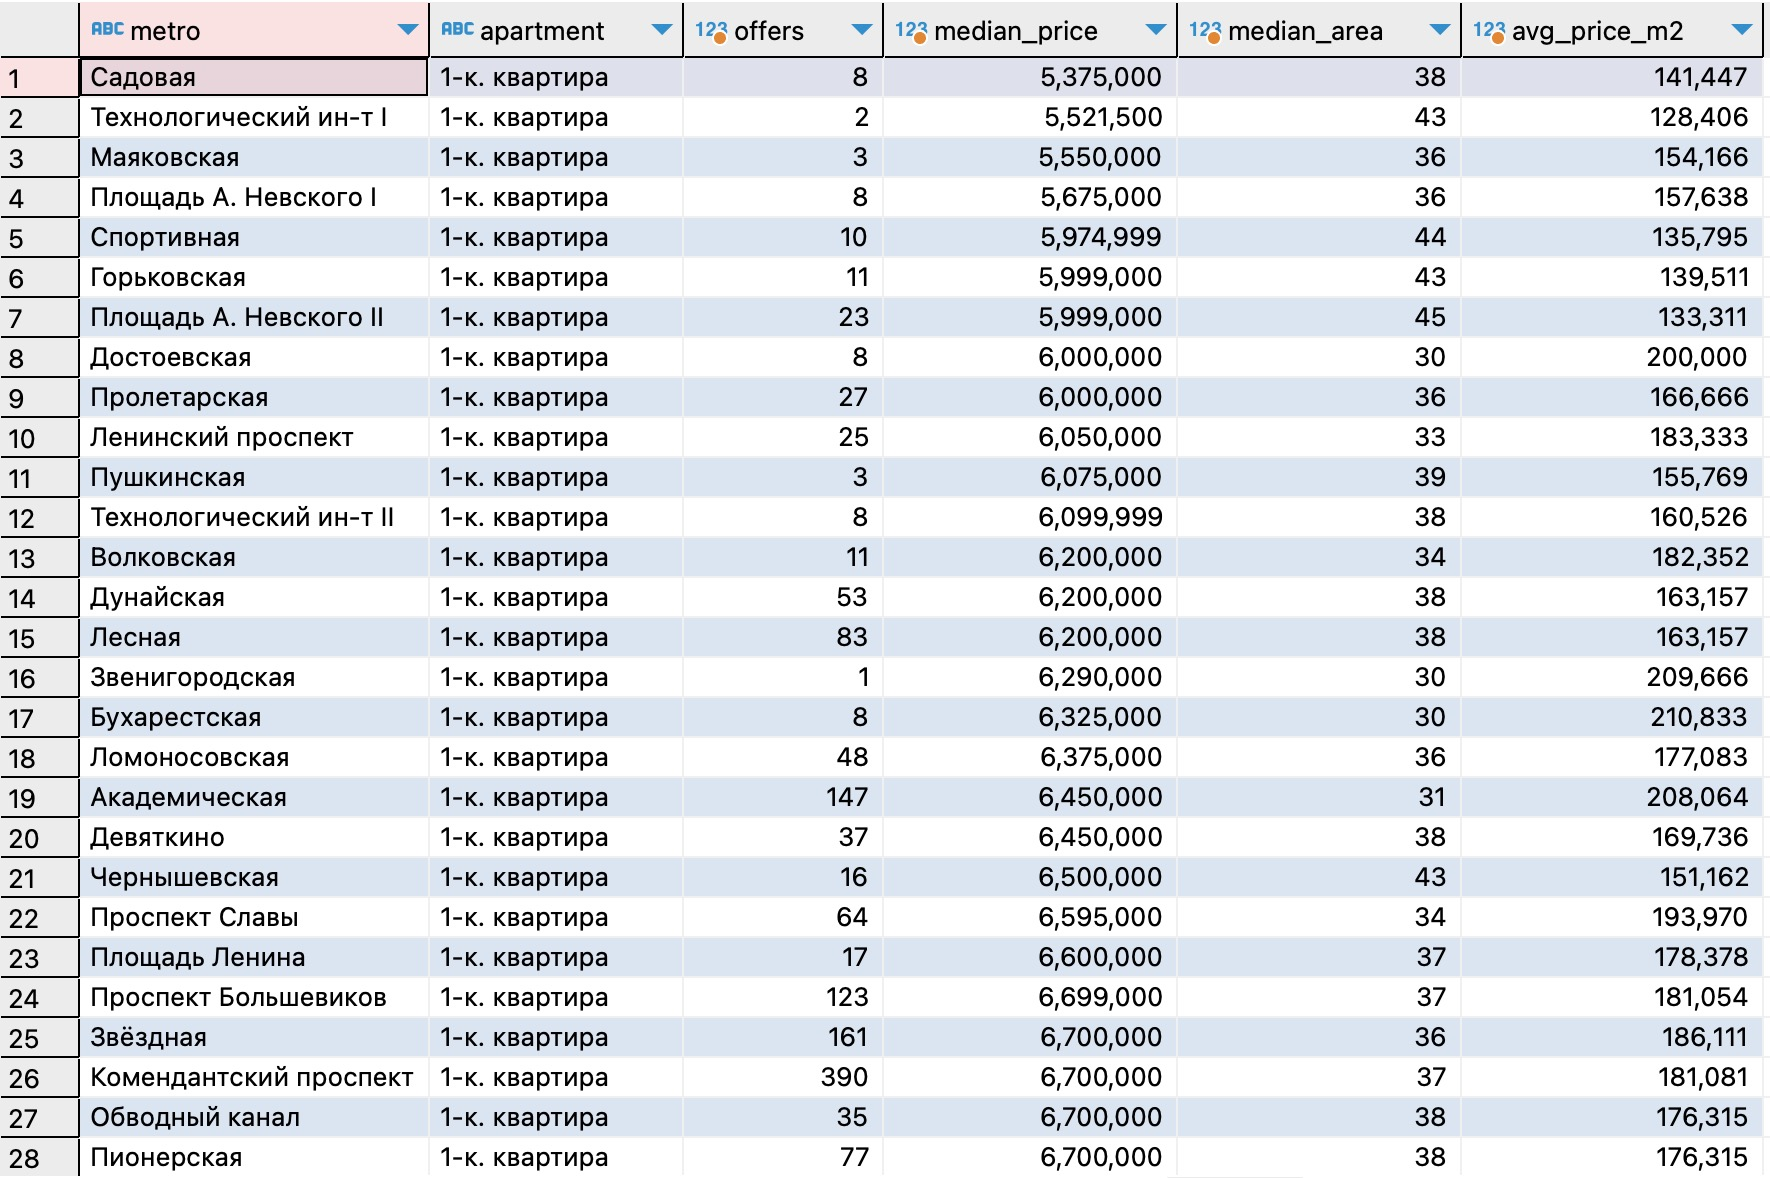
